In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
#Create data set from customer information
#Data imports
data = pd.read_csv('customer_data.csv')

#Convert this data file into to an array for the Kmeans function
train_data = (np.array(data))
train_data


array([[-8.11791236, -5.98531385,  8.8505521 ,  0.82400432],
       [ 6.68828084, -2.28344039, -4.18840392, -1.58201549],
       [-1.00627546, -2.58798573,  2.66065201,  3.4446174 ],
       ...,
       [-8.39550902,  0.67540583, -5.23452756, -1.38362356],
       [ 0.99164904, -6.96549618,  4.74782958, -6.33948619],
       [-9.41184926,  1.51008089, -5.45388931,  3.21941271]])

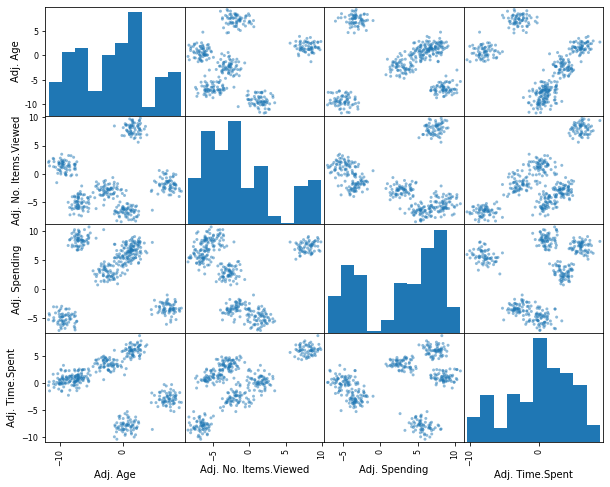

In [3]:
#Have a rought look at the type of association and number of clusters
from matplotlib import cm
from matplotlib import colors
cmap = cm.get_cmap('Spectral')

matrix_of_scatterplots =scatter_matrix(data, figsize=(10,8),diagonal='hist',cmap =cmap)


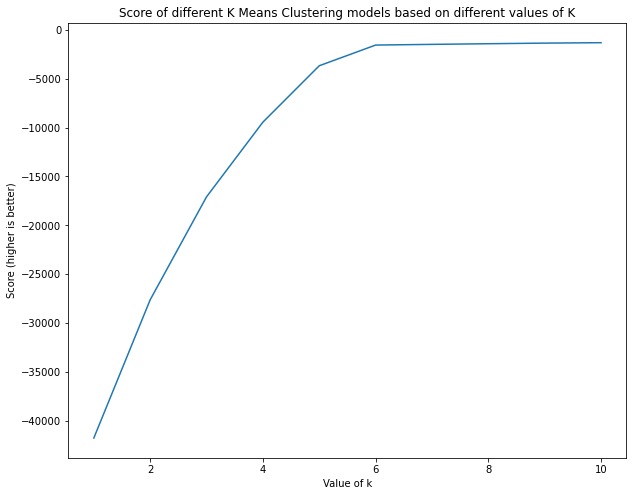

In [4]:
#Visually 6 clusters appears to be most common

#Take the inward dataset and try different numbers of clusters
#We are doing scoring of each number of clusters
scores = []
trial_num_clus = 11
for i in range(1,trial_num_clus ):
    model = KMeans(n_clusters=i) #So we are running i clusters
    model.fit(data)
    
    # Score the model
    scores.append(model.score(data))
    
#Now plot the results, which number of clusters causes the greatest change in gradient
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(list(range(1,trial_num_clus)), scores)

ax.set_xlabel("Value of k")
ax.set_ylabel("Score (higher is better)")
ax.set_title("Score of different K Means Clustering models based on different values of K")

plt.show()

In [5]:
#From the scatter plot and the above results I will choose 6 clusters
#Build and train the model

model = KMeans(n_clusters=6)

model.fit(train_data)


KMeans(n_clusters=6)

In [6]:
#See the predictions by above model
model.labels_

array([5, 0, 1, 1, 2, 3, 4, 2, 5, 4, 3, 0, 4, 2, 5, 3, 5, 1, 2, 3, 0, 2,
       2, 1, 1, 0, 2, 0, 5, 4, 2, 2, 5, 0, 5, 0, 0, 4, 4, 3, 2, 1, 3, 1,
       5, 4, 4, 2, 2, 3, 1, 4, 2, 0, 2, 4, 0, 3, 0, 0, 2, 1, 0, 0, 4, 4,
       4, 1, 1, 3, 4, 2, 0, 5, 5, 5, 0, 0, 1, 5, 0, 3, 0, 1, 2, 3, 2, 5,
       5, 0, 1, 2, 2, 4, 3, 3, 5, 0, 3, 2, 1, 5, 5, 0, 4, 2, 2, 3, 4, 1,
       1, 0, 5, 0, 5, 2, 0, 1, 5, 2, 3, 0, 4, 3, 2, 5, 3, 5, 3, 0, 1, 1,
       2, 2, 4, 5, 3, 0, 3, 1, 1, 0, 5, 4, 1, 2, 4, 5, 4, 4, 4, 2, 0, 2,
       2, 5, 0, 2, 2, 4, 5, 0, 2, 1, 3, 5, 5, 5, 1, 0, 4, 5, 1, 0, 1, 2,
       4, 1, 5, 3, 0, 2, 3, 5, 3, 1, 0, 2, 3, 3, 0, 4, 5, 4, 3, 4, 0, 2,
       2, 2, 0, 3, 0, 1, 4, 0, 4, 0, 1, 3, 2, 3, 3, 1, 3, 3, 0, 2, 0, 1,
       1, 1, 1, 1, 2, 2, 1, 0, 5, 1, 4, 5, 5, 2, 4, 1, 4, 1, 2, 3, 4, 4,
       2, 2, 1, 3, 1, 2, 5, 2, 4, 4, 3, 1, 3, 2, 5, 3, 1, 0, 1, 5, 4, 1,
       4, 5, 4, 1, 2, 1, 3, 5, 5, 3, 4, 0, 4, 3, 4, 5, 5, 1, 2, 3, 1, 0,
       3, 5, 4, 1, 1, 3, 0, 3, 5, 4, 5, 5, 3, 3, 3,

In [7]:
#Distance between cluster centers
model.cluster_centers_

array([[ 7.23278766, -1.82223   , -3.31517322, -2.92271841],
       [-2.30798969, -2.82696   ,  2.86618183,  3.45442508],
       [ 0.70654353, -6.66674883,  5.67913088, -7.95099035],
       [ 1.72535437,  7.98126408,  7.34863783,  6.04082157],
       [-9.31452627,  1.41121164, -5.01965254,  0.2947222 ],
       [-6.75848925, -5.14294944,  8.57722583,  1.03158095]])

In [8]:
#Now use the check customer data to see what cluster they fit into

In [9]:
customer_test = [[-2.4,5.88,3.12,-5.2],[2.11,8.42,6.82,8.21]]

In [10]:
model.predict(customer_test)

array([1, 3])

In [11]:
#With more time I could idebtify the features represented by these clusters